# Example: Static inverse free-boundary equilibrium calculations (in SPARC)

---

Here we will generate an equilibrium (find coil currents with the inverse solver) in a SPARC-like tokamak. 

The machine description comes from files located [here](https://github.com/cfs-energy/SPARCPublic).

The equilbirium\profile parameters are **completely made up** - please experiment on your own and change them to more realistic values as you please!

### Import packages

In [1]:
import os
import matplotlib.pyplot as plt
import freegs4e
import numpy as np

### Create the machine object

In [2]:
# set paths
os.environ["ACTIVE_COILS_PATH"] = f"../machine_configs/SPARC/SPARC_active_coils.pickle"
os.environ["PASSIVE_COILS_PATH"] = f"../machine_configs/SPARC/SPARC_passive_coils.pickle"
os.environ["WALL_PATH"] = f"../machine_configs/SPARC/SPARC_wall.pickle"
os.environ["LIMITER_PATH"] = f"../machine_configs/SPARC/SPARC_limiter.pickle"

In [3]:
# Now the machine can actually be built:
from freegsnke import build_machine
tokamak = build_machine.tokamak()

No coil named Solenoid among the active coils.
No probe configuration is provided


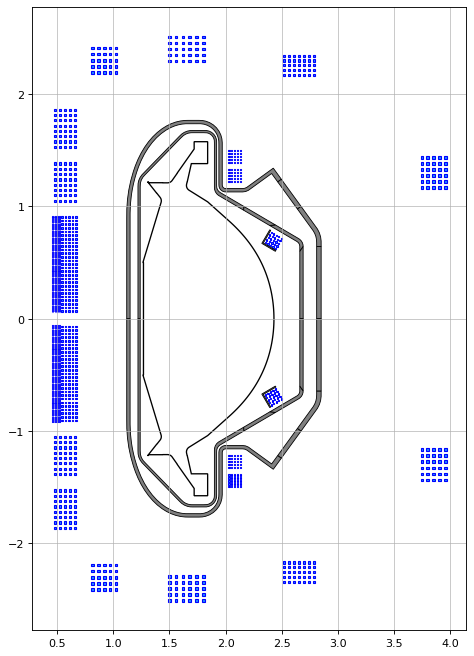

In [4]:
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 15), dpi=80)

ax1.grid(zorder=0, alpha=0.75)
ax1.set_aspect('equal')
tokamak.plot(axis=ax1,show=False)                                                          # plots the active coils and passive structures
ax1.fill(tokamak.wall.R, tokamak.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)   # plots the limiter


### Instantiate an equilibrium

In [5]:
from freegsnke import equilibrium_update

eq = equilibrium_update.Equilibrium(
    tokamak=tokamak,      # provide tokamak object
    Rmin=1.1, Rmax=2.7,   # radial range
    Zmin=-1.8, Zmax=1.8,  # vertical range
    nx=129,                # number of grid points in the radial direction (needs to be of the form (2**n + 1) with n being an integer)
    ny=129,                # number of grid points in the vertical direction (needs to be of the form (2**n + 1) with n being an integer)
    # psi=plasma_psi
)

### Instantiate a profile object

In [6]:
# initialise the profiles
from freegsnke.jtor_update import ConstrainPaxisIp
profiles = ConstrainPaxisIp(
    eq=eq,        # equilibrium object
    paxis=5e4,    # pressure on axis
    Ip=8.7e6,       # plasma current
    fvac=0.5,     # fvac = rB_{tor}
    alpha_m=1.8,  # profile function parameter
    alpha_n=1.2   # profile function parameter
)

### Load the static nonlinear solver

In [7]:
from freegsnke import GSstaticsolver
GSStaticSolver = GSstaticsolver.NKGSsolver(eq)    

### Constraints

In [8]:
Rx = 1.55      # X-point radius
Zx = 1.15      # X-point height

# set desired null_points locations
# this can include X-point and O-point locations
null_points = [[Rx, Rx], [Zx, -Zx]]

Rout = 2.4    # outboard midplane radius
Rin = 1.3    # inboard midplane radius

# set desired isoflux constraints with format 
# isoflux_set = [isoflux_0, isoflux_1 ... ] 
# with each isoflux_i = [R_coords, Z_coords]
isoflux_set = np.array([[[Rx, Rx, Rout, Rin, 1.7, 1.7], [Zx, -Zx, 0.0, 0.0, 1.5, -1.5]]])
           
# instantiate the freegsnke constrain object
from freegsnke.inverse import Inverse_optimizer
constrain = Inverse_optimizer(null_points=null_points,
                              isoflux_set=isoflux_set)

### The inverse solve

In [9]:
GSStaticSolver.inverse_solve(eq=eq, 
                     profiles=profiles, 
                     constrain=constrain, 
                     target_relative_tolerance=1e-6,
                     target_relative_psit_update=1e-3,
                     verbose=True, # print output
                     l2_reg=np.array([1e-16]*10 + [1e-5]), 
                     )
                     


Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 57285615.95833927
Control currents updated. Relative update of tokamak_psi in the core of: 57285615.95833927
Magnetic constraint losses = 0.3029871816257921
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  4.562322790727754
-----
Picard iteration: 0
Update too large, resized.
...relative error =  4.338849400047948
Iteration 1 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.3989590201725467
Control currents updated. Relative update of tokamak_psi in the core of: 0.3989590201725467
Magnetic constraint losses = 0.4534634843251272
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  3.409866327531436
-----
Picard iteration: 0
Update too large, resized.
...relative error =  3.

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 4.338849400047948.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 3.0105006069341673.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 2.076414158310976.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 1.3751183424472813.
  warnings.warn(
/Users/zn8047/Docu

Initial guess for plasma_psi successful, residual found.
Initial relative error =  1.136328453430547
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.836051266289751
Iteration 5 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.1970171710729089
Control currents updated. Relative update of tokamak_psi in the core of: 0.1970171710729089
Magnetic constraint losses = 1.1377407329663007
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.6646233540921571
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.4171869815109552
Iteration 6 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.1844941000406587
Control currents updated. Relative update of tokamak_psi in the core of: 0.1844941000406587
Magnetic constraint losses = 1.4347660722605886
Handing off to 

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.11305208449264281.
  warnings.warn(


-----
Newton-Krylov iteration: 0
...relative error =  0.00027960972163611604
-----
Newton-Krylov iteration: 1
...relative error =  3.748567379097054e-05
-----
Newton-Krylov iteration: 2
...relative error =  1.0875911356072755e-06
Forward static solve complete. Last relative residual: 1.0875911356072755e-06
 
Iteration 9 complete.
Using complete Jacobian to optimsise the currents.
Forward static solve complete. Last relative residual: 7.25383564388584e-08
 
Forward static solve complete. Last relative residual: 5.121281322082882e-07
 
Forward static solve complete. Last relative residual: 3.964496916533135e-07
 
Forward static solve complete. Last relative residual: 5.327790991672828e-07
 
Forward static solve complete. Last relative residual: 7.182589357804722e-07
 
Forward static solve complete. Last relative residual: 7.534666795186926e-07
 
Forward static solve complete. Last relative residual: 7.55770726893919e-07
 
Forward static solve complete. Last relative residual: 2.496223129

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 1e-06 with less than 5.0 iterations. Last relative psi change: 1.114277019152087e-06.
  warnings.warn(


Forward static solve complete. Last relative residual: 4.727133488962061e-07
 
Forward static solve complete. Last relative residual: 4.3825029373369147e-07
 
Forward static solve complete. Last relative residual: 6.51307969157663e-07
 
Forward static solve complete. Last relative residual: 8.922969749882752e-07
 
Forward static solve complete. Last relative residual: 2.560479729606995e-07
 
Forward static solve complete. Last relative residual: 6.006054228931681e-07
 
Forward static solve complete. Last relative residual: 1.4256440438888737e-07
 
Forward static solve complete. Last relative residual: 7.655361711115472e-07
 
Forward static solve complete. Last relative residual: 8.040996170768546e-07
 
Forward static solve complete. Last relative residual: 2.580704044982928e-07
 
Forward static solve complete. Last relative residual: 1.3082420322305927e-07
 
requested rel_delta_psit 0.00016633348215189576
Control currents updated. Relative update of tokamak_psi in the core of: 0.000163

This equilibrium has not been solved: the separatrix can not be drawn.
Please solve first for a plot of the critical points.


(-2.0, 2.0)

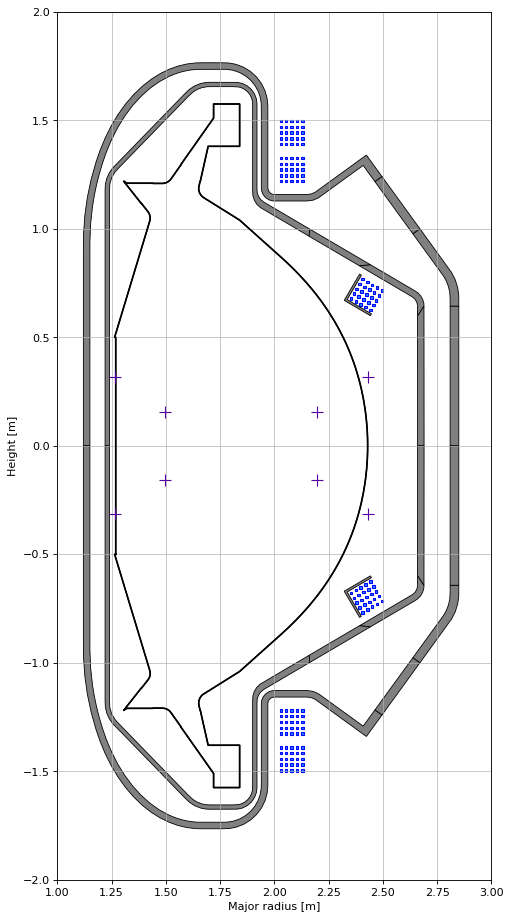

In [22]:
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 15), dpi=80)

ax1.grid(zorder=0, alpha=0.75)
ax1.set_aspect('equal')
eq.tokamak.plot(axis=ax1,show=False)                                                          # plots the active coils and passive structures
ax1.fill(tokamak.wall.R, tokamak.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)   # plots the limiter
eq.plot(axis=ax1,show=False)                                                                  # plots the equilibrium
constrain.plot(axis=ax1, show=False)                                                          # plots the contraints
ax1.set_xlim(1.0, 3.0)
ax1.set_ylim(-2.0, 2.0)

In [11]:
eq.tokamak.getCurrents()

# # save coil currents to file
# import pickle
# with open('simple_diverted_currents_PaxisIp.pk', 'wb') as f:
#     pickle.dump(obj=inverse_current_values, file=f)

{'CS1I': -67750.00737353947,
 'CS1O': -61588.42764444935,
 'CS2': -162906.60946658257,
 'CS3': 58001.55254663225,
 'PF1': 100420.3150361129,
 'PF2': 88284.18794949273,
 'PF3': -97548.86880277933,
 'PF4': -140162.17000015388,
 'DV1': 19990.568299210423,
 'DV2': -8231.233436264509,
 'VS1': -0.0001166886346116602,
 'vacuum_vessel_0': 0.0,
 'vacuum_vessel_1': 0.0,
 'vacuum_vessel_2': 0.0,
 'vacuum_vessel_3': 0.0,
 'vacuum_vessel_4': 0.0,
 'vacuum_vessel_5': 0.0,
 'vacuum_vessel_6': 0.0,
 'vacuum_vessel_7': 0.0,
 'vacuum_vessel_8': 0.0,
 'vacuum_vessel_9': 0.0,
 'vacuum_vessel_10': 0.0,
 'vacuum_vessel_11': 0.0,
 'vacuum_vessel_12': 0.0,
 'vacuum_vessel_13': 0.0,
 'vacuum_vessel_14': 0.0,
 'vacuum_vessel_15': 0.0,
 'VSC_coil_cover0': 0.0,
 'VSC_coil_cover1': 0.0}